In [2]:
%matplotlib inline
from matplotlib.pyplot import figure, gcf

In [3]:
def graficar(xs, ys, cursores_x={}, cursores_y={}, asintota=[], tamaño=(9, 6), imprimir_etiquetas=True, archivo=""):
    
    def imprimir_cursores(cursores, margenes, eje, axis, δ):
        etiquetas = cursores.keys()
        if eje is "x":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([valor, valor], [margenes[0], margenes[1]], '--r')
                axis.text(valor, -δ, etiqueta, color='red')
        if eje is "y":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([margenes[0], margenes[1]], [valor, valor], '--r')
                axis.text(-10*δ, valor, etiqueta, horizontalalignment="right", color='red')
                
    from matplotlib.pyplot import figure
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Noto Sans'], 'size':16.0})
    #rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    #rc('text', usetex=True)
    
    δx = 0.01*abs(max(xs) - min(xs))
    δy = 0.01*abs(max(ys) - min(ys))
    
    margenes_x = [min(xs) - δx, max(xs) + δx]
    margenes_y = [min(ys) - δy, max(ys) + δy]
    
    fig = figure(figsize=tamaño)
    fig.tight_layout()
    ax = fig.gca()

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["right"].set_color("none")
    ax.tick_params(top=False, right=False)

    ax.axes.spines["left"].set_position("zero")
    #ax.axes.spines["left"].set_axisline_style("->")
    ax.axes.spines["bottom"].set_position("zero")
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.plot(xs, ys, 'k')
    ax.axes.set_xlim(margenes_x[0], margenes_x[1])
    ax.axes.set_ylim(margenes_y[0], margenes_y[1])
    fig.canvas.draw()
    
    if len(asintota) > 0:
        ax.plot(asintota[0], asintota[1], "--r")
    
    #for direction in ["xzero", "yzero"]:
    #    ax.axis[direction].set_visible(True)
    #    ax.axis[direction].set_axisline_style("->")
    
    if imprimir_etiquetas == False:
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
    if len(cursores_x) > 0:
        imprimir_cursores(cursores_x, margenes_y, "x", ax, δx)
    if len(cursores_y) > 0:
        imprimir_cursores(cursores_y, margenes_x, "y", ax, δy)

    labels = ax.xaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)

    labels = ax.yaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)
            
    if len(archivo) > 0:
        fig.savefig(archivo, transparent=True)
    return ax

In [4]:
from control import tf, impulse_response, step_response
from numpy import linspace, exp

In [5]:
G = tf([1],[1, 1, 1])
t = linspace(0, 10, 100)
t,y = impulse_response(G, t)
ya = exp(-0.5*t+0.2)+0.05

/Users/roberto/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


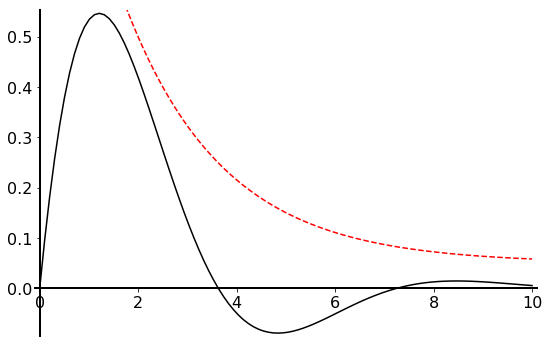

In [6]:
ax2 = graficar(t,y, asintota=[t,ya], archivo="est_exp.png")

/Users/roberto/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


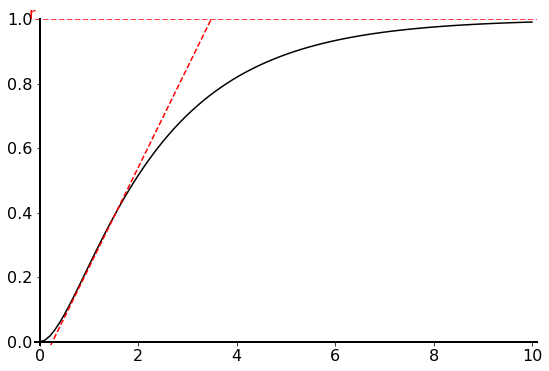

In [39]:
G = tf([1],[1, 2.5, 1])
t = linspace(0, 10, 100)
t,y = step_response(G, t)
asin = lambda x: 0.31*x-0.08
ya = asin(t)
ax3 = graficar(t,y, cursores_y={r"r":1}, asintota=[t, ya], archivo="sint-esc1.png")

/Users/roberto/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


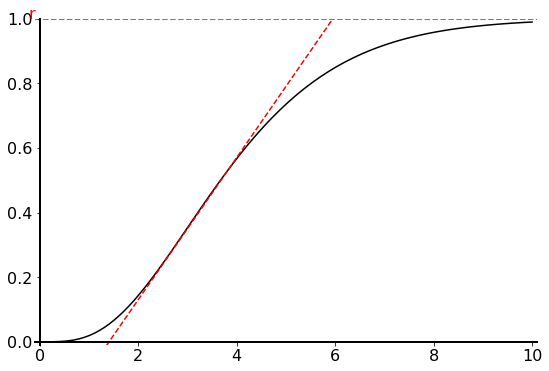

In [57]:
G = tf([1],[1, 4, 6, 4, 1])
t = linspace(0, 10, 100)
t,y = step_response(G, t)
asin = lambda x: 0.22*x-0.31
ya = asin(t)
ax3 = graficar(t,y, cursores_y={r"r":1}, asintota=[t, ya], archivo="sint-esc2.png")

In [58]:
from numpy import sqrt, pi

In [66]:
0.125*2*pi/sqrt(3)

0.45344984105855446

In [60]:
2*pi

6.283185307179586

In [63]:
2*pi/2

3.141592653589793

In [62]:
2*.45

0.9

In [64]:
pi/4

0.7853981633974483